In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
std_range = 0.025
min_count = 30

In [14]:
dimuon = pd.read_csv('http://opendata.cern.ch/record/545/files/Dimuon_DoubleMu.csv')

In [15]:
def get_particle(energy):
    if energy > 0.48 and energy < 0.52:
        return "K⁰ (Neutral Kaon)"
    elif energy > 0.53 and energy < 0.57:
        return "η (Eta)"
    elif energy > 0.77 and energy < 0.78:
        return "ρ (770) (Rho)"
    elif energy > 0.78 and energy < 0.79:
        return "ω (782) (Omega)"
    elif energy > 1 and energy < 1.05:
        return "Φ (1020) (Phi)"
    elif energy > 1.83 and energy < 1.9:
        return "D⁰ (Neutral D meson)"
    elif energy > 3.05 and energy < 3.15:
        return "J/ψ (J/Psi)"
    elif energy > 3.65 and energy < 3.75:
        return "ψ (2S) (Psi)"
    elif energy > 4.15 and energy < 4.25:
        return "ψ (4160) (Psi)"
    elif energy > 5.25 and energy < 5.30:
        return "B⁰ (Neutral B meson)"
    elif energy > 5.35 and energy < 5.40:
        return "B⁰ₛ (Neutral, strange B meson)"
    elif energy > 9.38 and energy < 9.42:
        return "ηᵇ (1S) (Eta)"
    elif energy > 9.43 and energy < 9.49:
        return "Y (1S) (Y meson)"
    elif energy > 10 and energy < 10.05:
        return "Y (2S) (Y meson)"
    elif energy > 10.32 and energy < 10.40:
        return "Y (3S) (Y meson)"
    elif energy > 91 and energy < 91.5:
        return "Z"
    else:
        return "unknown"

In [16]:
# Each slice overlaps with up to 50 previous slices of data.
#
# It will grow the slice size a little bit as the energy gets higger
def next_slice(last_start, last_end):
    last_step = last_end - last_start
    next_start = last_start + last_step / 50
    next_end = next_start * 1.0955
    return (next_start, next_end)

In [17]:
# Energy limit to search
maximum = 120

# Initialize slice limits and mode list
(st, end) = next_slice(0.4, 0.4)
modes = []

In [ ]:
while True:
    # We got to the end of the dataset, just end the iteration
    if end > maximum:
        break

    # We get the slice of data
    slc = dimuon[(dimuon.M >= st) & (dimuon.M <= end)]

    # We calculate the mean, mode and standard deviation
    mean = slc.M.mean()
    mode = slc.M.mode().mean()
    std = slc.M.std()

    # We set the "modified" variable to know if we chnged the modes
    modified = False
    for idx, item in enumerate(modes):
        if item['val'] == mode:
            # There was some other mode with this energy before, we add one to the counter
            modes[idx]['count'] += 1
            if item['std'] > std:
                # The new standard deviation is lower, let's update it
                modes[idx]['std'] = std
            modified = True
            break

    # There was no previous mode with this energy, let's add a new one
    if not modified:
        modes.append({'val': mode, 'count': 1, 'std': std})

    # Get the next slice limits
    (st, end) = next_slice(st, end)

In [12]:
# After trial and error, seems that particles with more than 30 modes
# and a standard deviation of 2.4% in respect to the current energy are real particles
#found = (m for m in modes if m['std']/m['val'] < 0.024 and m['count'] > 30)
#for pot in found:
 #   particle = get_particle(pot['val'])
  #  print("'{}' particle at {:.3} GeV with {} modes (std: {:.3} [{:.3} %]".format(particle, pot['val'], pot['count'], pot['std'], pot['std']/pot['val'] * 100))


'ρ (770) (Rho)' particle at 0.771 GeV with 48 modes (std: 0.018 [2.34 %]
'Φ (1020) (Phi)' particle at 1.01 GeV with 48 modes (std: 0.0229 [2.27 %]
'J/ψ (J/Psi)' particle at 3.11 GeV with 46 modes (std: 0.0419 [1.35 %]
'ψ (2S) (Psi)' particle at 3.72 GeV with 42 modes (std: 0.0788 [2.12 %]
'Y (1S) (Y meson)' particle at 9.45 GeV with 34 modes (std: 0.201 [2.12 %]
'Z' particle at 91.1 GeV with 41 modes (std: 1.78 [1.95 %]


In [13]:
# There might be potential false positives/negatives with these values
#potential = (m for m in modes if (m['std']/m['val'] < 0.025 and m['count'] > 40) and m['std']/m['val'] >= 0.024)
#for pot in potential:
 #   particle = get_particle(pot['val'])
  #  print("Potential '{}' particle at {:.3} GeV with {} modes (std: {:.3} [{:.4} %]".format(particle, pot['val'], pot['count'], pot['std'], pot['std']/pot['val'] * 100))


Potential 'η (Eta)' particle at 0.545 GeV with 48 modes (std: 0.0136 [2.496 %]
Potential 'unknown' particle at 1.22 GeV with 45 modes (std: 0.0305 [2.492 %]
Potential 'unknown' particle at 2.46 GeV with 45 modes (std: 0.0608 [2.468 %]
Potential 'unknown' particle at 6.75 GeV with 48 modes (std: 0.167 [2.475 %]
Potential 'unknown' particle at 19.5 GeV with 48 modes (std: 0.487 [2.496 %]
Potential 'unknown' particle at 56.5 GeV with 48 modes (std: 1.37 [2.421 %]


In [10]:
peaks = (p for p in modes if (p['std']/p['val'] < std_range and p['count'] > min_count))

massPeaks = np.array([])

for peak in peaks:
    massPeaks = np.append(massPeaks, peak['val'])
    
print(massPeaks)

[ 0.5455      0.7707      1.0082      1.2226      2.4625      3.1065
  3.7163      5.3239      6.7481      9.45486667 19.5161     56.5238
 91.13973333]


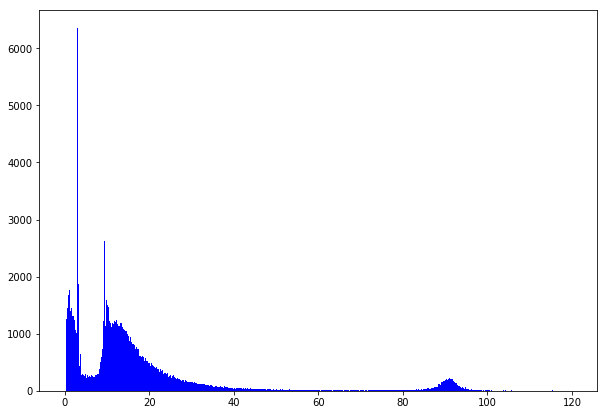

In [15]:
#plt.figure(figsize = (10, 7))
#plt.hist(dimuon.M, bins = 500, range = (0, 120), color = "blue")
#plt.show()